# Exercise 2a: Plotting

## Aim: Learn to create plots with the inbuilt `.plot()` function

Find the teaching resources here: https://tutorial.xarray.dev/fundamentals/04.1_basic_plotting.html

### Issues Covered: 
- Creating and customising plots using the inbuilt xarray `.plot()` function
- Creating a time-series using `.sel()` and `.isel()` and plotting these.

## 1. Plotting

Q1. Import the `'../data/xbhubo.pgc0apr.nc'` dataset and create the temperature data array as in the last lesson.

In [1]:
import xarray as xr
ds= xr.open_dataset("../data/xbhubo.pgc0apr.nc")
temp=ds['temp']

Q2. Try a simple .plot() on your temperature dataarray, to see what xarray does. Why has it done this?

(array([167948.,  74985.,  46325.,  32775.,  30391.,  26162.,  25805.,
         27845.,  21516.,    587.]),
 array([-1.79998779,  1.88496089,  5.56990957,  9.25485802, 12.93980694,
        16.62475586, 20.30970383, 23.9946537 , 27.67960167, 31.36455154,
        35.04949951]),
 <BarContainer object of 10 artists>)

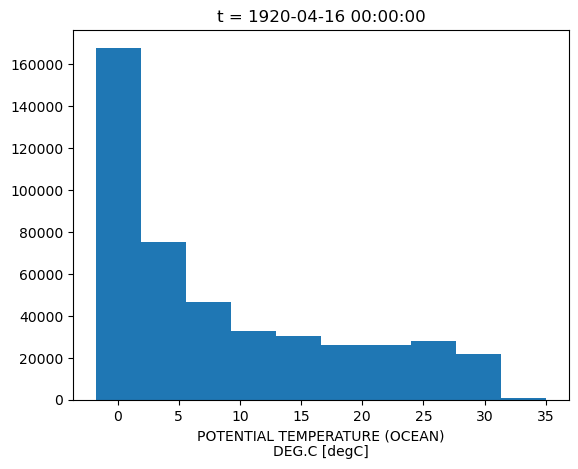

In [2]:
temp.plot()

Q3. Next, try the same with a 2-dimensional view of your dataset. Try selecting sea surface temperature values and plotting those.

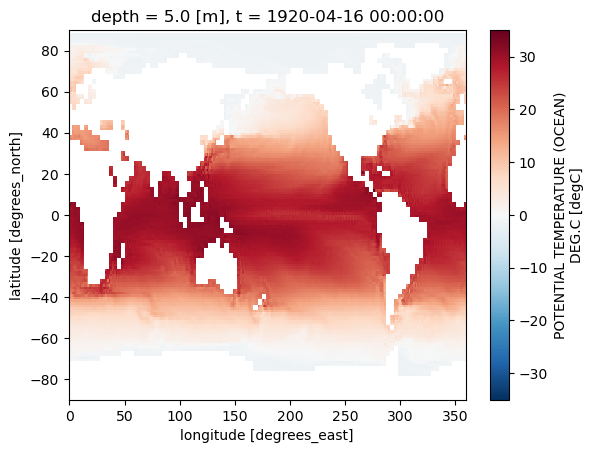

In [7]:
temp_1=temp.sel(depth=5, method='nearest').plot()


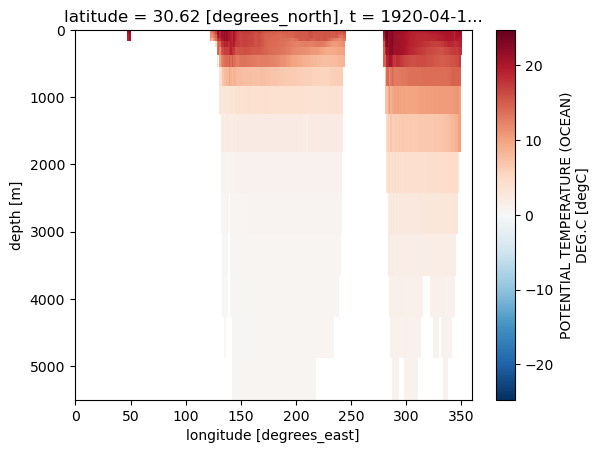

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

temp_2=temp.sel(latitude=30, method='nearest').plot()
ax=plt.gca()
ax.invert_yaxis()

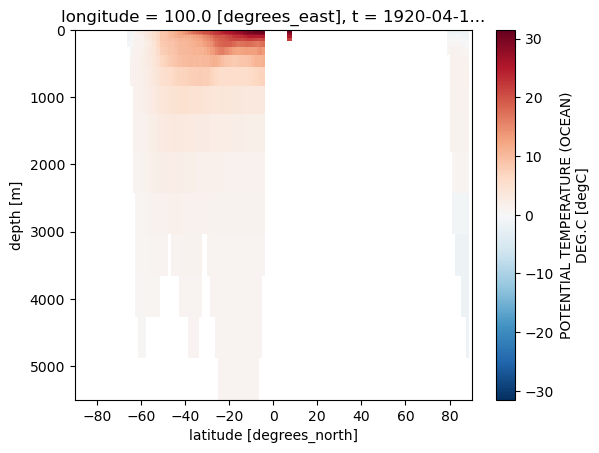

In [5]:
temp_3=temp.sel(longitude=100, method='nearest').plot()
ax=plt.gca()
ax.invert_yaxis()

Q4. Finally, create a depth profile from `temperature` by using `sel` to select data for the same latitude and longitude values (31,0).

Hint: The latitude value is `-50.625` and the longitude value is `0`. All 3 of these methods will return the same dataset.

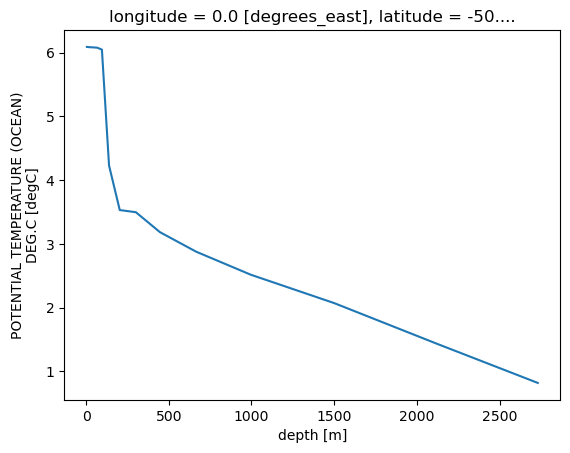

In [13]:
temp_prof=temp.sel(latitude=-50.625,longitude=0, method='nearest').plot()

Q5. Create a plot from this time series.

Q6. Make the plot red with 'x' marking the points.

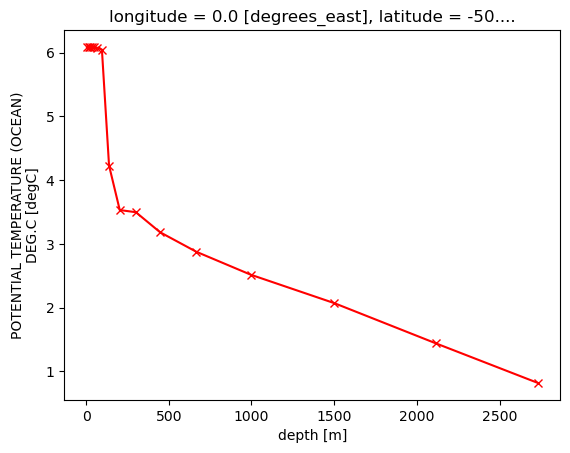

In [16]:
temp_prof=temp.sel(latitude=-50.625,longitude=0, method='nearest').plot(color='r',marker='x')

Q7. Create a time series plot comparing the temperature profile at three different grid cells:
 - lat = 0, lon = 0
 - lat = 10, lon = 10
 - lat = 20, lon = 20

Make sure each time series has a different colour and include a legend. As an extension, give them different linestyles too.
Hint: use `.isel` to index the lat and lon.

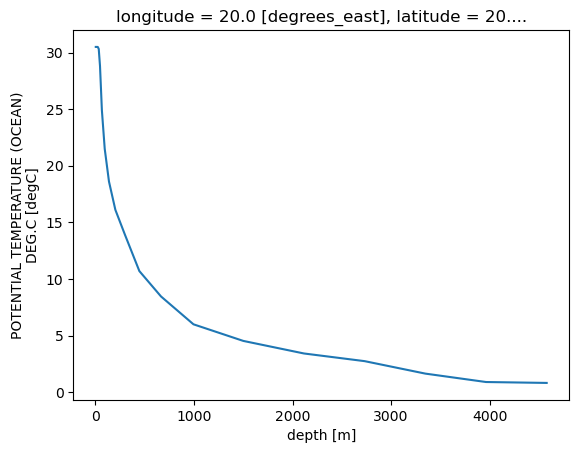

In [6]:
import matplotlib.pyplot as plt

temp_1 = temp.sel(latitude=0, longitude=0, method='nearest' )
temp_2 = temp.sel(latitude=10, longitude=10, method='nearest')
temp_3 = temp.sel(latitude=20, longitude=20, method='nearest')

# Plot 
temp_1.plot()
temp_2.plot()
temp_3.plot()



Q8. Let's plot some data in 2D. Use `sel` to select data for 200 meters below the surface.

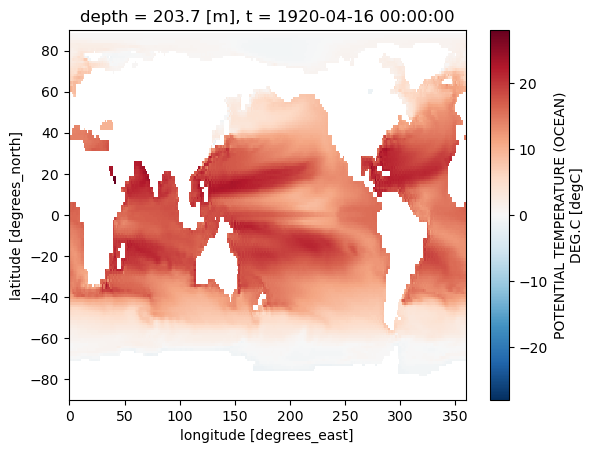

In [16]:
temp_specific = temp.sel(depth='200', method='nearest')
temp_specific.plot()

In [17]:
temp_specific

<xarray.DataArray 'temp' (t: 1, latitude: 144, longitude: 288)> Size: 166kB
[41472 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude   (latitude) float32 576B -89.38 -88.12 -86.88 ... 88.12 89.38
    depth      float32 4B 203.7
  * t          (t) object 8B 1920-04-16 00:00:00
Attributes:
    source:     Unified Model Output:
    name:       temp
    title:      POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    date:       01/12/99
    time:       00:00
    long_name:  POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    units:      degC
    valid_min:  -1.7999878
    valid_max:  35.0495

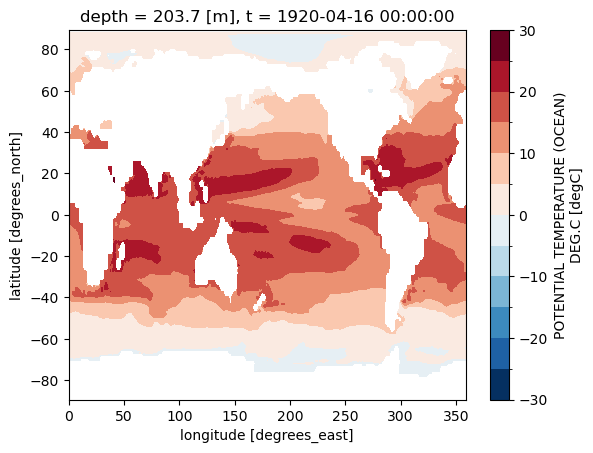

In [14]:
specific_time = temp.sel(depth='200', method='nearest')
specific_time.squeeze().plot.contourf(levels=15)